In [270]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

import math

np.set_printoptions(precision=5,linewidth=120,suppress=True)

# the bisect module enables to easily keep an ordered list
# cf. https://docs.python.org/3.7/library/bisect.html
# useful for maintaining the OPEN list
import bisect

In [271]:
def breadthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    upper = math.inf
    parent = len(graph)*[None]
    di = np.ones(len(graph)) * math.inf
    di[start_node] = 0
    OPEN = [start_node]
    steps = 0
    empty = []
    while OPEN != empty:

        steps += 1
        current = OPEN.pop(0)
        #print(current)
        
        
        children=graph[current] 
        for child in children:
            
            if (di[current]+cost[current,child])<min(upper,di[child]):
                di[child] = di[current]+cost[current,child]
                parent[child] = current
                if child != end_node and child not in OPEN:
                    OPEN.append(child)
                if child == end_node:
                    upper = di[child]
            
    i = end_node
    list_shortest = [i]
    while i != 0:
        i = parent[i]
        list_shortest.append(i)
    
    path = list_shortest[::-1]
    
    print("BFS Distance: ", di[end_node])
    print("BFS Number of Steps: ",steps)
    

    return path
        
def depthFirstSearch(graph, start_node, end_node, cost):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """
    upper = math.inf
    parent = len(graph)*[None]
    di = np.ones(len(graph)) * math.inf
    di[start_node] = 0
    OPEN = [start_node]
    steps = 0
    empty = []
    while OPEN != empty:

        steps += 1
        current = OPEN.pop(0)
        #print(current)
        
        
        children=graph[current] 
        for child in children:
            
            if (di[current]+cost[current,child])<min(upper,di[child]):
                di[child] = di[current]+cost[current,child]
                parent[child] = current
                if child != end_node and child not in OPEN:
                    OPEN.insert(0,child)
                if child == end_node:
                    upper = di[child]
            
    i = end_node
    list_shortest = [i]
    while i != 0:
        i = parent[i]
        list_shortest.append(i)
    
    path = list_shortest[::-1]
    
    print("DFS Distance: ", di[end_node])
    print("DFS Number of Steps: ",steps)
    

    return path

def AStar(graph, start_node, end_node, cost, heuristic):
    """
    TO BE COMPLETED
    this function gets a graph, a start_node, end_node and cost list as entry
    and returns a path (list of nodes) as output
    it return an empty list in case of failure
    """

    parent = len(graph)*[None]
    di = np.ones(len(graph)) * np.inf
    di[start_node] = 0
    OPEN = [[start_node,0]]
    CLOSED = []
    steps = 0
    end_coord = list(convert_to_matrixindex(end_node,len(graph)))
    while(len(OPEN) != 0):

        current = OPEN.pop(0)
        current = current[0]
        CLOSED.append(current)
        if current == end_node:
            break
        steps += 1
        children = graph[current] 
        for child in children:
            #row,col=convert_to_matrixindex(child,len(graph))
            if child not in CLOSED:
                if (di[current] + cost[current,child]) < di[child]:
                    start_coord = list(convert_to_matrixindex(current,len(graph)))
                    di[child] = di[current]+cost[current,child]
                    parent[child] = current
                    vi = di[child]+ heuristic[child]
                    OPEN.append([child,vi])
        OPEN=(sorted(OPEN, key = lambda x: x[1]))                         

    i = end_node
    list_shortest = [i]
    while i != 0:
        i = parent[i]
        list_shortest.append(i)
    
    path = list_shortest[::-1]
    
    print("AStar Distance: ", di[end_node])
    print("AStar Number of Steps: ",steps)
    

    return path
    

In [272]:
def display_result(world_mat, path):
    """
    This function displays a maze described in world_mat and a path inside the maze
    world_mat: a NxN matrix that contains the maze (0 for free path, -10 for obstacle)
    path: a list of elements numbered as the graph (i.e. from 0 to N**2-1)
    """
    N = world_mat.shape[0]
    display_mat = world_mat.copy()
    for el in path:
        display_mat[convert_to_matrixindex(el,N)] = 5
    plt.matshow(display_mat, cmap='Greys')
    
def convert_to_listindex(i,j,N):
    """
    This function converts a (i,j) matrix entry index to a list index for matrix of size N
    """
    return N*i+j

def convert_to_matrixindex(a,N):
    """
    This function converts a list entry a into a (i,j) matrix entry for matrix of size N
    """
    i = int(a/N) # the result of integer division
    j = int(a%N) # the  remainder of the division
    return i,j

def create_graph(world_mat):
    """
    This functions takes a NxN matrix in entry and creates a graph and a map of costs
    Since we use lists, for a world_mat of size NxN, we associate to the entry [i,j] of world_map
    the index a=N*i + j of the list
    output:
        graph: a list of neighbors  (indexed as explained above)
        cost: a N**2 x  N**2 array. Each entry cost[i,j] contains the cost of transitioning from node i to node j
            it is infinite if there is no edge from i to j
    """
    N = world_mat.shape[0]
    graph = []
    for i in range(N):
        for j in range(N):
            neigh = []
            if(i!=N-1):
                if(world_mat[i+1,j]==0):
                    neigh.append(N*(i+1)+j)
            if(i!=0):
                if(world_mat[i-1,j]==0):
                    neigh.append(N*(i-1)+j)
            if(j!=N-1):
                if(world_mat[i,j+1]==0):
                    neigh.append(N*i+j+1)
            if(j!=0):
                if(world_mat[i,j-1]==0):
                    neigh.append(N*i+j-1)
            graph.append(neigh)
    
    cost = np.ones([N*N,N*N]) * np.inf
    
    for i in range(N*N):
        for j in graph[i]:
            cost[i,j] = 1
    
    return graph, cost

[[ 0.  0.  0.  0. 10.]
 [ 0. 10. 10.  0.  0.]
 [ 0. 10.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.]
 [ 0. 10. 10.  0.  0.]]


<IPython.core.display.Javascript object>


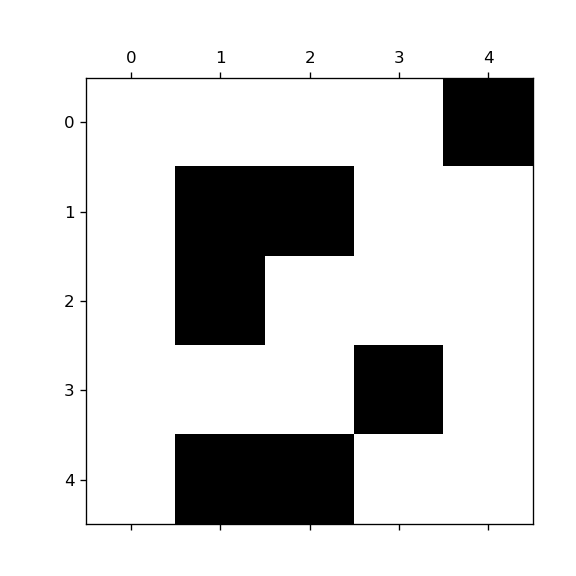

In [273]:
# let's create a map corresponding to the robot path planning example of lecture 3
# it is a 5x5 grid
world_map = np.zeros([5,5])
# and it contains obstacles which we mark as non 0
world_map[0,4] = 10
world_map[1,1:3] = 10
world_map[2,1] = 10
world_map[3,3] = 10
world_map[4,1:3] = 10

# we can print the matrix
print(world_map)

# we can now display the result
display_result(world_map, [])

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 3)
(1, 4)
(2, 4)
(3, 4)
(4, 4)


<IPython.core.display.Javascript object>


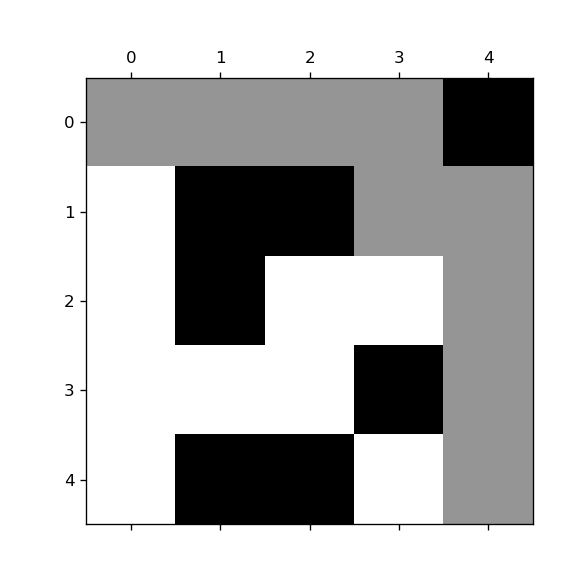

In [29]:
# let's assume we have a path from (0,0) to (4,4) that does (in linear index)
path = [0,1,2,3,8,9,14,19,24]

# we print the equivalent in matrix entries
for a in path:
    print(convert_to_matrixindex(a, 5))

# and we display it on the world grid (shown in grey)
display_result(world_map, path)


In [274]:
# we can also create the associated graph and costs
graph, cost = create_graph(world_map)

# the neighbors of entry the cell [0,0] are
print('Neighbors of entry [0,0]')
a = convert_to_listindex(0,0,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))
    
print('\n\nNeighbors of entry [2,3]')
a = convert_to_listindex(2,3,5)
neighborhs = graph[a]
for n in neighborhs:
    print('in linear indexes: ' + str(n) + ' which corresponds to the matrix entry: ' + str(convert_to_matrixindex(n,5)))

Neighbors of entry [0,0]
in linear indexes: 5 which corresponds to the matrix entry: (1, 0)
in linear indexes: 1 which corresponds to the matrix entry: (0, 1)


Neighbors of entry [2,3]
in linear indexes: 8 which corresponds to the matrix entry: (1, 3)
in linear indexes: 14 which corresponds to the matrix entry: (2, 4)
in linear indexes: 12 which corresponds to the matrix entry: (2, 2)


<IPython.core.display.Javascript object>


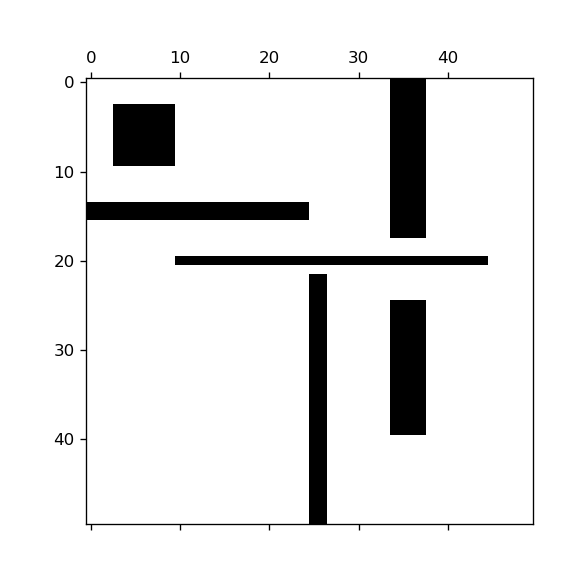

<IPython.core.display.Javascript object>


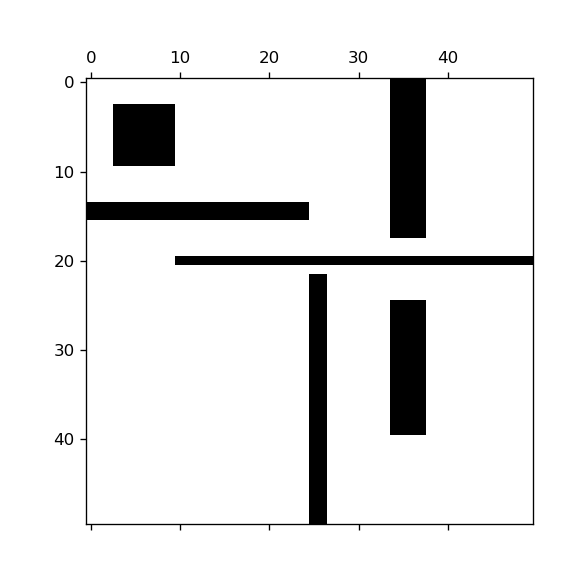

<IPython.core.display.Javascript object>


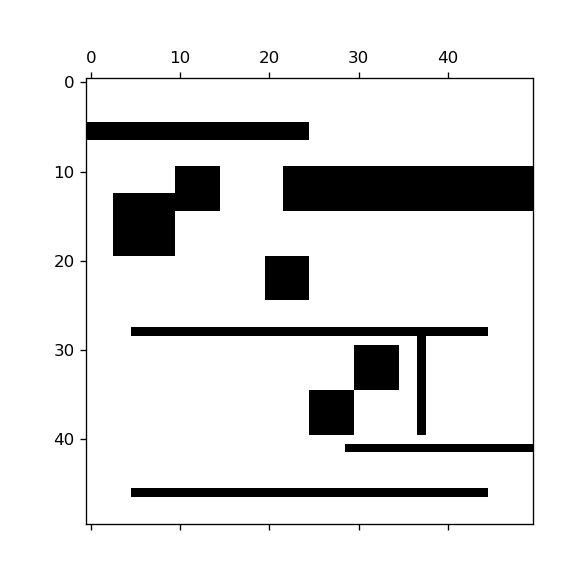

In [275]:
# here we load the 3 mazes and display them
maze1 = np.load('maze1.npy')
display_result(maze1, [])

maze2 = np.load('maze2.npy')
display_result(maze2, [])

maze3 = np.load('maze3.npy')
display_result(maze3, [])


# Depth First Search

### 1. For World Map:

In [276]:
maze0 = world_map

In [277]:
graph0, cost0 = create_graph(maze0)
sp_path0 = depthFirstSearch(graph0, 0, 24, cost0)

DFS Distance:  8.0
DFS Number of Steps:  17


<IPython.core.display.Javascript object>


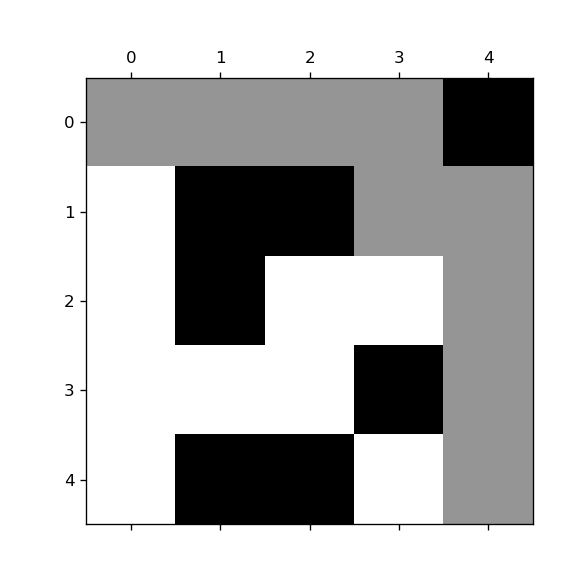

In [278]:
display_result(maze0, sp_path0)

### 2. For Maze 1:

In [279]:
graph1, cost1 = create_graph(maze1)
sp_path1 = depthFirstSearch(graph1, 0,2499, cost1)

DFS Distance:  98.0
DFS Number of Steps:  223241


<IPython.core.display.Javascript object>


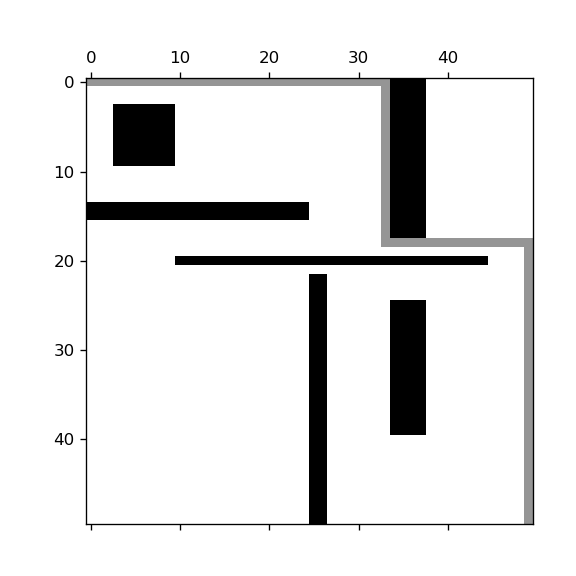

In [281]:
display_result(maze1, sp_path1)

### 3. For Maze 2:

In [282]:
graph2, cost2 = create_graph(maze2)
sp_path2 = depthFirstSearch(graph2, 0,2499, cost2)

DFS Distance:  130.0
DFS Number of Steps:  176721


<IPython.core.display.Javascript object>


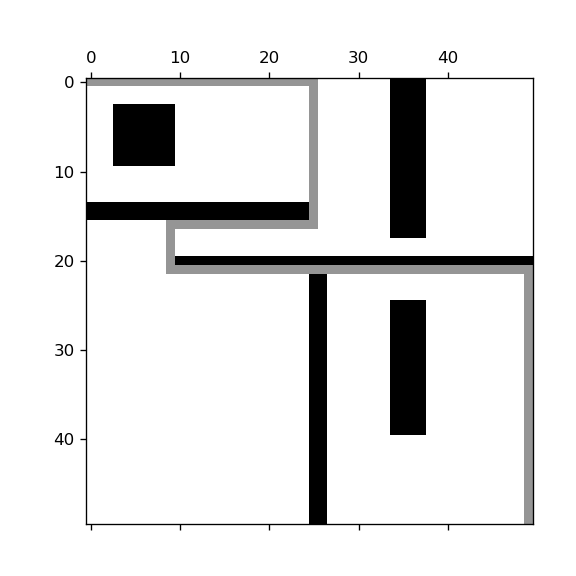

In [284]:
display_result(maze2, sp_path2)

### 4. For Maze 3:

In [285]:
graph3, cost3 = create_graph(maze3)
sp_path3 = depthFirstSearch(graph3,0,2499, cost3)

DFS Distance:  140.0
DFS Number of Steps:  332734


<IPython.core.display.Javascript object>


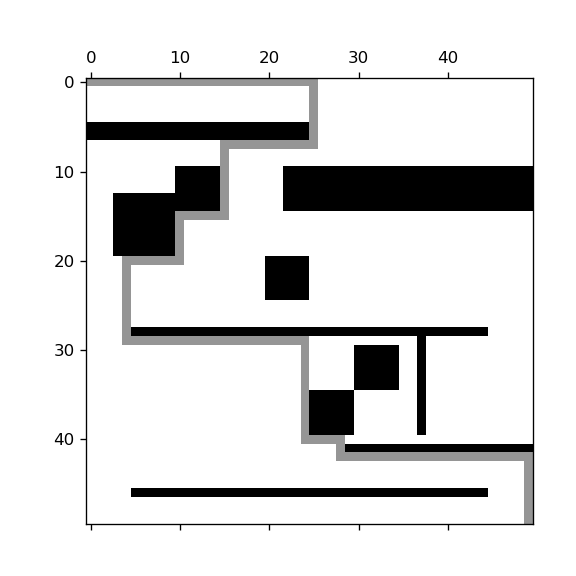

In [286]:
display_result(maze3, sp_path3)

# Breath First Search

### 1. For World Map:

In [290]:
maze0 = world_map

In [291]:
graph0, cost0 = create_graph(maze0)
sp_path0 = breadthFirstSearch(graph0, 0, 24, cost0)

BFS Distance:  8.0
BFS Number of Steps:  16


<IPython.core.display.Javascript object>


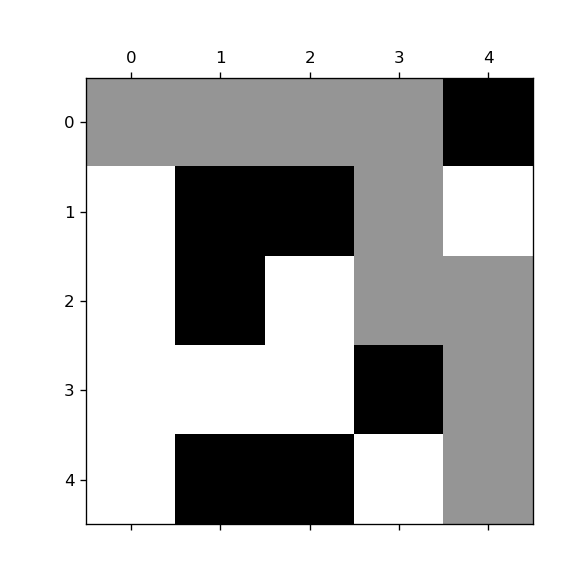

In [292]:
display_result(maze0, sp_path0)

### 2. For Maze 1:

In [219]:
graph1, cost1 = create_graph(maze1)
sp_path1 = breadthFirstSearch(graph1, 0, 2499, cost1)

BFS Distance:  98.0
BFS Number of Steps:  2024


<IPython.core.display.Javascript object>


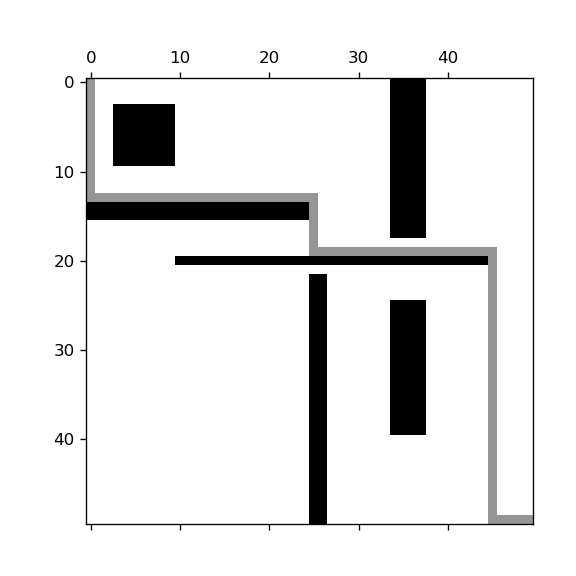

In [220]:
display_result(maze1, sp_path1)

### 3. For Maze 2:

In [222]:
graph2, cost2 = create_graph(maze2)
sp_path2 = breadthFirstSearch(graph2, 0, 2499, cost2)

BFS Distance:  130.0
BFS Number of Steps:  2172


<IPython.core.display.Javascript object>


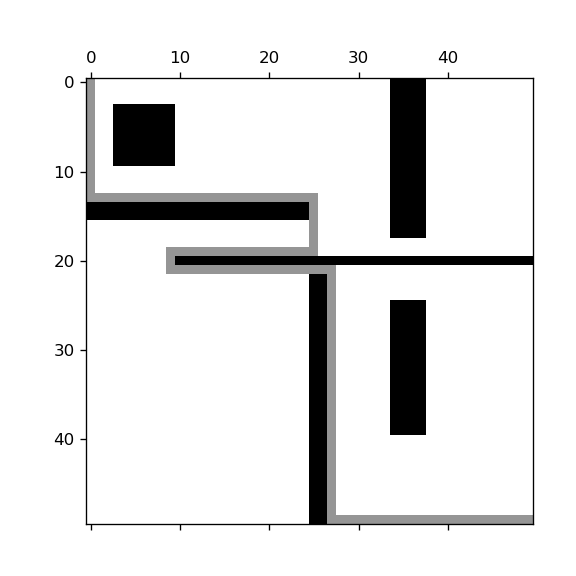

In [223]:
display_result(maze2, sp_path2)

### 4. For Maze 3:

In [226]:
graph3, cost3 = create_graph(maze3)
sp_path3 = breadthFirstSearch(graph3, 0, 2499, cost3)

BFS Distance:  140.0
BFS Number of Steps:  2048


<IPython.core.display.Javascript object>


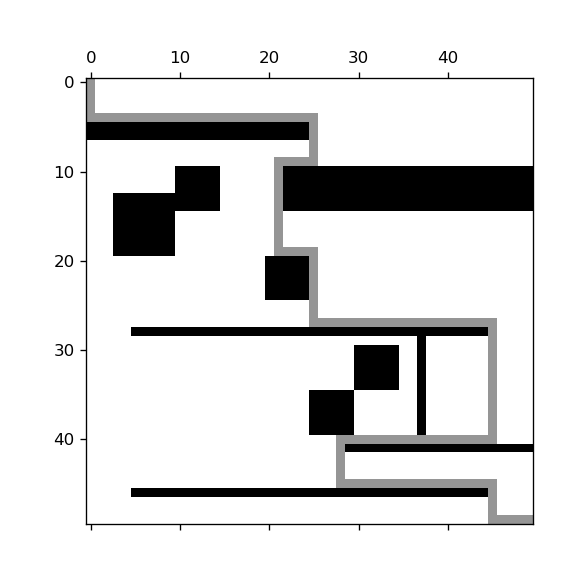

In [227]:
display_result(maze3, sp_path3)

# A Star 

### 1. For World Map:

In [299]:
def heuristic(graph):
    N = int(math.sqrt(len(graph)))
    #print(N)
    heuristic = []
    for i in list(range(N)):
        for j in list(range(N)):
            #h_ij = 0
            h_ij = abs(i - (N-1)) + abs(j - (N-1));
            heuristic.append(h_ij)
    #print(heuristic)
    return heuristic

In [300]:
maze0 = world_map

In [301]:
graph0, cost0 = create_graph(maze0)
h = heuristic(graph0)
sp_path0 = AStar(graph0, 0, 24, cost0, h)

AStar Distance:  8.0
AStar Number of Steps:  15


<IPython.core.display.Javascript object>


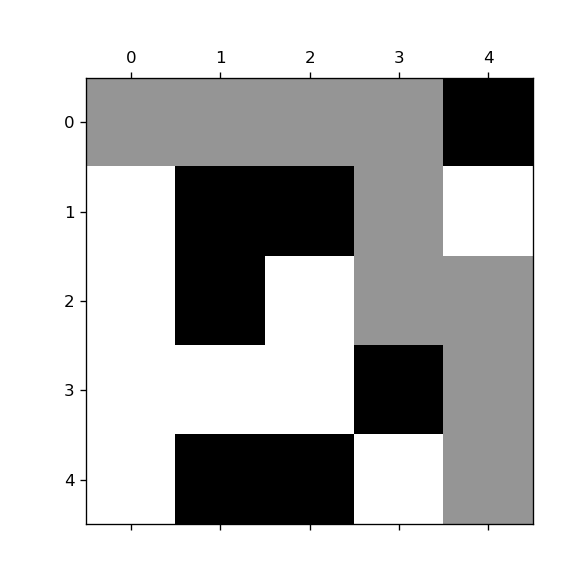

In [302]:
display_result(maze0, sp_path0)

### 2. For Maze 1:

In [303]:
graph1, cost1 = create_graph(maze1)
h = heuristic(graph1)
sp_path1 = AStar(graph1, 0, 2499, cost1,h)

AStar Distance:  98.0
AStar Number of Steps:  662


<IPython.core.display.Javascript object>


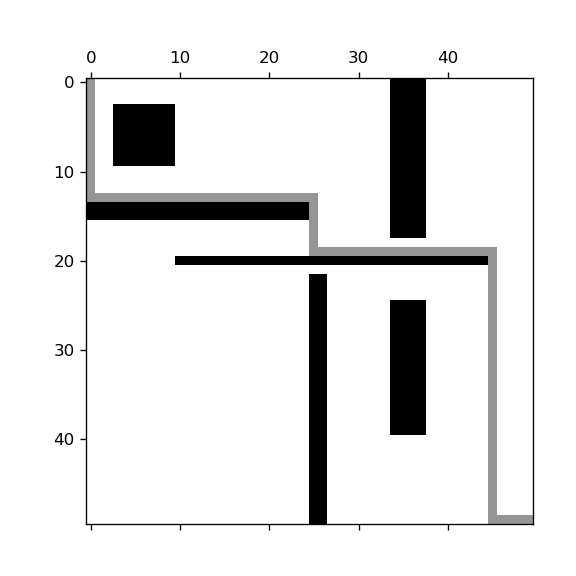

In [298]:
display_result(maze1, sp_path1)

### 3. For Maze 2:

In [255]:
graph2, cost2 = create_graph(maze2)
h = heuristic(graph2)
sp_path2 = AStar(graph2, 0, 2499,cost2,h)

AStar Distance:  130.0
AStar Number of Steps:  1842


<IPython.core.display.Javascript object>


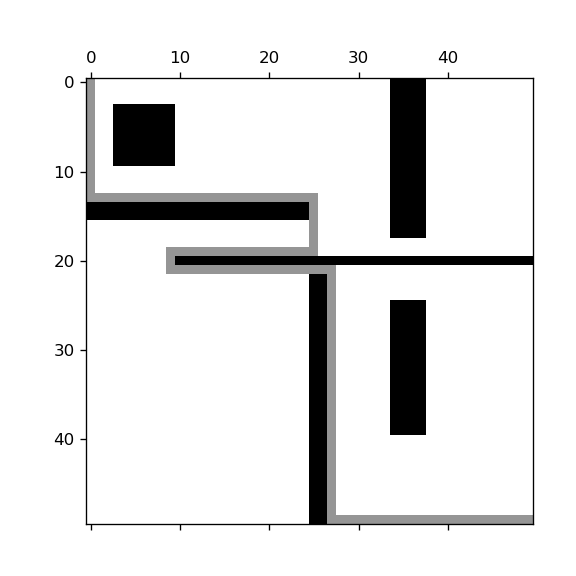

In [256]:
display_result(maze2, sp_path2)

### 4. For Maze 3:

In [257]:
graph3, cost3 = create_graph(maze3)
h = heuristic(graph3)
sp_path3 = AStar(graph3,0,2499, cost3, h)

AStar Distance:  140.0
AStar Number of Steps:  1705


<IPython.core.display.Javascript object>


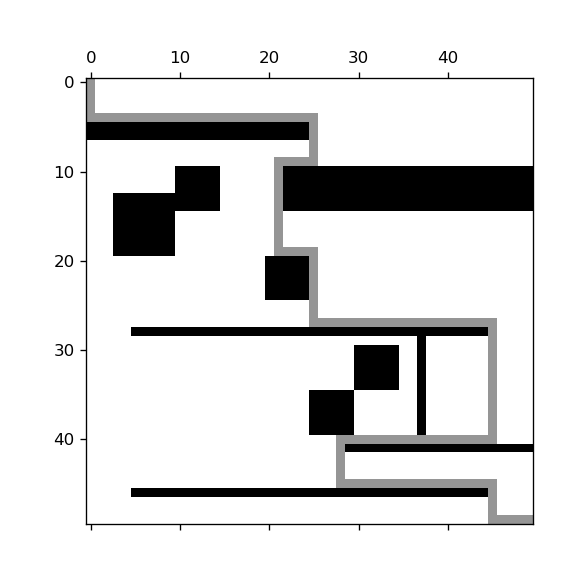

In [258]:
display_result(maze3, sp_path3)

# A Star - Heuristic = 0

### 1. For World Map:

In [259]:
def heuristic(graph):
    N = int(math.sqrt(len(graph)))
    #print(N)
    heuristic = []
    for i in list(range(N)):
        for j in list(range(N)):
            h_ij = 0
            #h_ij = abs(i - (N-1)) + abs(j - (N-1));
            heuristic.append(h_ij)
    #print(heuristic)
    return heuristic

In [260]:
maze0 = world_map

In [261]:
graph0, cost0 = create_graph(maze0)
h = heuristic(graph0)
sp_path0 = AStar(graph0, 0, 24, cost0, h)

AStar Distance:  8.0
AStar Number of Steps:  16


<IPython.core.display.Javascript object>


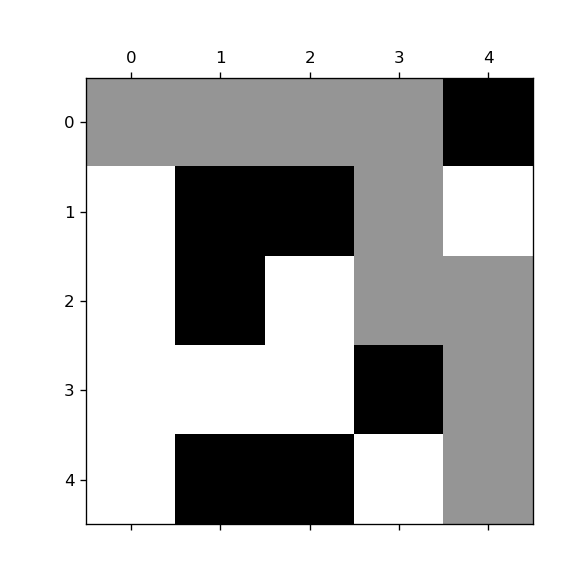

In [262]:
display_result(maze0, sp_path0)

### 2. For Maze 1:

In [263]:
graph1, cost1 = create_graph(maze1)
h = heuristic(graph1)
sp_path1 = AStar(graph1, 0, 2499, cost1,h)

AStar Distance:  98.0
AStar Number of Steps:  2024


<IPython.core.display.Javascript object>


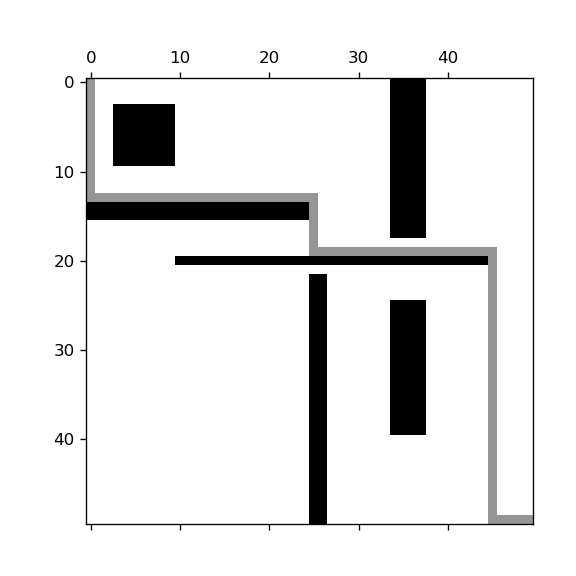

In [264]:
display_result(maze1, sp_path1)

### 3. For Maze 2:

In [265]:
graph2, cost2 = create_graph(maze2)
h = heuristic(graph2)
sp_path2 = AStar(graph2, 0, 2499,cost2,h)

AStar Distance:  130.0
AStar Number of Steps:  2172


<IPython.core.display.Javascript object>


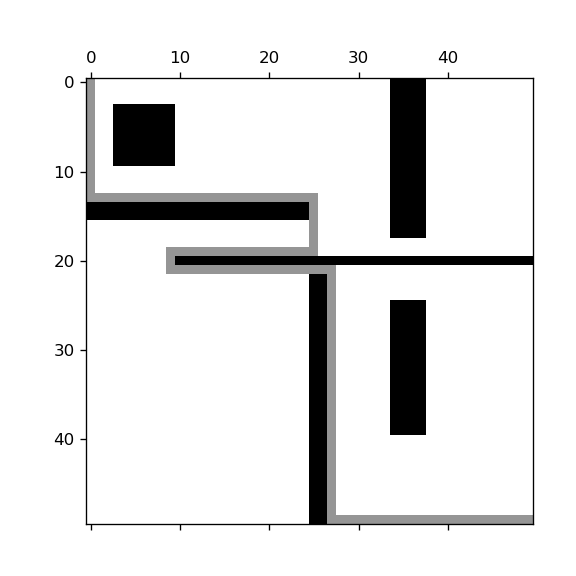

In [266]:
display_result(maze2, sp_path2)

### 4. For Maze 3:

In [267]:
graph3, cost3 = create_graph(maze3)
h = heuristic(graph3)
sp_path3 = AStar(graph3,0,2499, cost3, h)

AStar Distance:  140.0
AStar Number of Steps:  2048


<IPython.core.display.Javascript object>


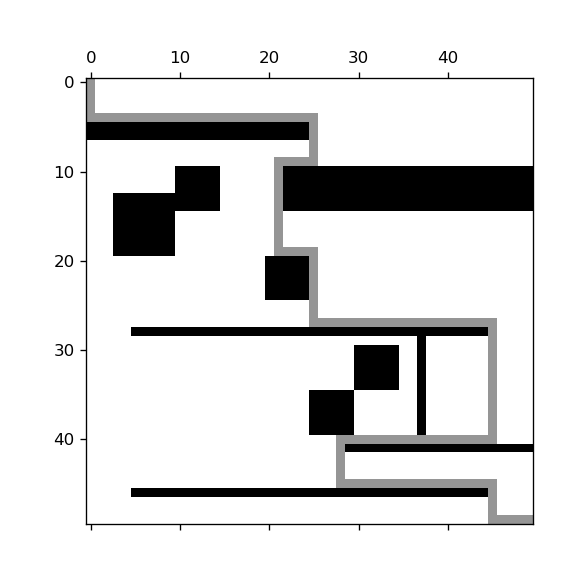

In [268]:
display_result(maze3, sp_path3)